# Important: understanding cross entropy

## Why isn't MSE well suited for classification ?

In [1]:
(150000 - 200000) ** 2 

2500000000

In [ ]:
( chat - chien ) ** 2 

In [2]:
( 1 - 2 ) ** 2 

1

In [4]:
( 1 -  ) ** 2 

9

## cross-entropy is a loss function, just like MSE
you want it as small as possible

In [ ]:
ma_loss( prediction, targets)

In [5]:
import pandas as pd 
import numpy as np

### First, calculate probabilities that sum to one

In [7]:
preds = {'cat':5, 'dog':4, 'horse':2}
preds = pd.Series(preds)
preds

cat      5
dog      4
horse    2
dtype: int64

In [8]:
exp_preds = np.exp(preds)

In [9]:
exp_preds

cat      148.413159
dog       54.598150
horse      7.389056
dtype: float64

In [17]:
df = pd.DataFrame([preds, exp_preds])
df['sum'] = np.sum(df, axis=1)
df = df.T
df.columns = ['preds', 'preds_a_lexposant']
df

,preds,preds_a_lexposant
cat,5.0,148.413159
dog,4.0,54.598150
horse,2.0,7.389056
sum,11.0,210.400365


In [14]:
148 / 210

0.7047619047619048

In [18]:
df['softmax'] = df['preds_a_lexposant'] / df['preds_a_lexposant'][3]

In [19]:
df

,preds,preds_a_lexposant,softmax
cat,5.0,148.413159,0.705385
dog,4.0,54.598150,0.259496
horse,2.0,7.389056,0.035119
sum,11.0,210.400365,1.000000


In [21]:
# double check 
df['softmax'][:3].sum()

1.0

In [23]:
df['softmax_bis'] = df['preds'] / df['preds'][3]
df

,preds,preds_a_lexposant,softmax,softmax_bis
cat,5.0,148.413159,0.705385,0.454545
dog,4.0,54.598150,0.259496,0.363636
horse,2.0,7.389056,0.035119,0.181818
sum,11.0,210.400365,1.000000,1.000000


### then, find a way to penalize highly the model if you don't have the right (highest) probability 

In [8]:
example = pd.read_excel('excel files/entropy_example.xlsx', sheet_name='log_entropy')

In [9]:
example

,isCat,isDog,Preds,logPredCat,logPredDog,NLL,idx,idxPred
0,1,0,0.50,-0.301030,-0.30103,0.301030,1,-0.301030
1,1,0,0.98,-0.008774,-1.69897,0.008774,1,-0.008774
2,0,1,0.90,-0.045757,-1.00000,1.000000,2,-1.000000
3,0,1,0.50,-0.301030,-0.30103,0.301030,2,-0.301030
4,1,0,0.90,-0.045757,-1.00000,0.045757,1,-0.045757


In [39]:
isCat = 1
isDog = 9

PredsDog = 0.99
PredsCat = 1 - PredsDog
print("the model says: ", np.round(PredsDog, 2) * 100, "% chance that this is a cat, ", PredsCat * 100, "% chance that this is a dog")

the model says:  99.0 % chance that this is a cat,  1.0000000000000009 % chance that this is a dog


In [36]:
logPredCat = -np.log(PredsCat)
logPredDog = -np.log(PredsDog)  # we are interested in this number 
print(logPredCat, logPredDog)
# here, we keep logPredDog, because we were supposed to predict a dog (and we were 99% sure it was a cat...)

4.605170185988091 0.01005033585350145


<img src="images/cross_entropy.jpg"> </img>

<a href="https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/"> source </a>

In [72]:
preds_line_four = [0.37, 0.33, .3] #line four is a picture of a horse

# we take the probability of the correct class
target = [0,0,1]
print(np.argmax(target))  
print(preds_line_four[np.argmax(target)])

 # we pass it to the negative log 
print(-np.log(preds_line_four[np.argmax(target)]))

2
0.3
1.2039728043259361


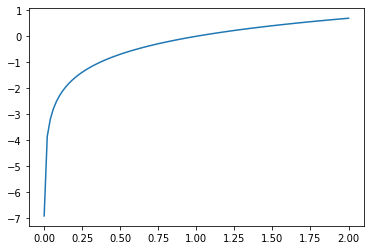

In [73]:
import matplotlib.pyplot as plt

x = np.linspace(0.001, 2, 100)
y = [np.log(xi) for xi in x]
plt.plot(x, y)

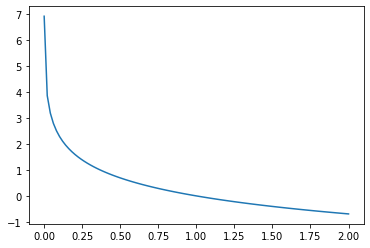

In [68]:
y = [-np.log(xi) for xi in x]
plt.plot(x,y)

## But, just like MSE, it doesn't suit every problem !

Can you think of a setup where neither MSE or Cross-Entropy would make sense ?

## You try to predict somebody's age using their picture. Which loss would you use and why ?

In [ ]:
MEAN ABSOLUTE ERROR

In [97]:
np.mean([((800000 - 200000) ** 2 ), (( 450000 - 500000) ** 2 ) ]) ** (1/2)

425734.65914816

In [99]:
np.mean([np.abs((800000 - 200000) ), np.abs(( 450000 - 500000) ) ])

325000.0

In [86]:
np.abs((800000 - 200000))

600000

In [89]:
np.abs(200000 - 800000) 

600000

This won't work... some outputs will be put to infinity because of the .exp() :

In [17]:
def log_softmax(output):
    return (output.exp() / output.exp().sum(-1, keepdim=True)).log()

In [18]:
output.max(-1)[0].shape

torch.Size([60000])

instead we can use the log-sum-exp-trick:
https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/

In [19]:
def logsumexp(x):
    m = x.max(-1)[0]
    return m + (x-m[:, None]).exp().sum(-1).log()

def log_softmax(x):
    return x - x.logsumexp(-1, keepdim=True)

In [20]:
# negative log likelihood
def nll(output, y_train):
    # we use y_train to know which one
    # of the ten predictions we want to use
    return -output[range(y_train.shape[0]), y_train].mean()

In [21]:
# that way we get only 60000 numbers
log_softmax(output)[range(60000), y_train]

tensor([-102.8454, -304.8141,  -45.5277,  ...,   -0.7240, -160.0200,
          -5.2032])

In [22]:
# from which we take the mean, and we have our loss
nll(log_softmax(output), y_train)

tensor(170.4121)